In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [ ]:
datos = pd.read_csv("data (1).csv")
datos

,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
1,2,Gisele,Fliege,gfliege1@xing.com,996.87,132.90,2755.58,242.53,1424.95,0.6752,0.9371
2,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
3,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
4,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Adore,Kearle,akearlern@mayoclinic.com,6916.30,739.44,2132.93,2400.08,1990.31,0.3912,0.0311
996,997,Sibella,Lendrem,slendremro@soundcloud.com,11300.85,NaN,2866.75,2949.20,NaN,0.0848,0.6572
997,998,Morna,Arrault,marraultrp@netscape.com,2089.96,2059.00,1177.63,1638.11,342.47,0.3671,0.8045
998,999,Clyve,Pilling,cpillingrq@marriott.com,10311.18,3449.11,3617.03,2202.28,3.93,0.2113,0.5737


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   Nombre                         1000 non-null   object 
 2   Apellido                       1000 non-null   object 
 3   Mail                           1000 non-null   object 
 4   Ingreso                        968 non-null    float64
 5   Compras mensuales un pago      948 non-null    float64
 6   Compras mensuales cuotas       921 non-null    float64
 7   Pagos crédito                  943 non-null    float64
 8   Ahorro                         948 non-null    float64
 9   Frecuencia de compras un pago  941 non-null    float64
 10  Frecuencia de compras cuotas   943 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


In [ ]:
datos.describe()

,ID,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
count,1000.000000,968.000000,948.000000,921.000000,943.000000,948.000000,941.000000,943.000000
mean,500.500000,5785.631942,2451.846814,1944.068100,1480.925249,997.056951,0.482726,0.490983
std,288.819436,3496.756511,1433.223014,1141.592949,853.214458,573.771676,0.291558,0.290396
min,1.000000,16.150000,1.340000,3.120000,2.880000,3.000000,0.000100,0.000100
25%,250.750000,2717.545000,1229.677500,969.480000,772.330000,495.585000,0.228100,0.232300
50%,500.500000,5571.940000,2502.785000,1864.080000,1490.160000,1000.285000,0.471600,0.500300
75%,750.250000,8839.272500,3665.605000,2839.340000,2187.705000,1473.930000,0.741500,0.738800
max,1000.000000,11999.600000,4993.010000,3994.230000,2999.320000,1999.420000,0.999600,0.998100


<AxesSubplot:>

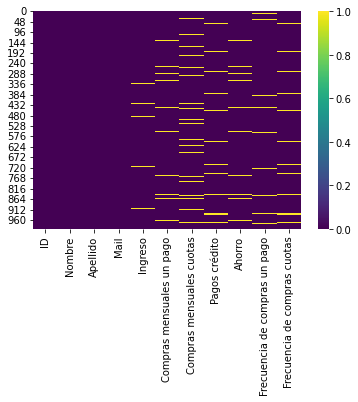

In [ ]:
sns.heatmap(datos.isnull(),cmap="viridis")

Vemos que es hay muchos datos nulos,entonces no os podemos eliminar. MAs adelante cuando nos aseguremos que esta normalizada,la reemplazamos por la media.

In [ ]:
datos.dropna()

,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
1,2,Gisele,Fliege,gfliege1@xing.com,996.87,132.90,2755.58,242.53,1424.95,0.6752,0.9371
2,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
3,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
4,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847
...,...,...,...,...,...,...,...,...,...,...,...
994,995,Bar,Espie,bespierm@blogs.com,1524.82,4175.25,159.15,1185.31,1218.24,0.4804,0.4750
995,996,Adore,Kearle,akearlern@mayoclinic.com,6916.30,739.44,2132.93,2400.08,1990.31,0.3912,0.0311
997,998,Morna,Arrault,marraultrp@netscape.com,2089.96,2059.00,1177.63,1638.11,342.47,0.3671,0.8045
998,999,Clyve,Pilling,cpillingrq@marriott.com,10311.18,3449.11,3617.03,2202.28,3.93,0.2113,0.5737


Si los eliminariamos nos quedariamos con 756, que srria aprox un 25%.

In [ ]:
datos

,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
1,2,Gisele,Fliege,gfliege1@xing.com,996.87,132.90,2755.58,242.53,1424.95,0.6752,0.9371
2,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
3,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
4,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Adore,Kearle,akearlern@mayoclinic.com,6916.30,739.44,2132.93,2400.08,1990.31,0.3912,0.0311
996,997,Sibella,Lendrem,slendremro@soundcloud.com,11300.85,NaN,2866.75,2949.20,NaN,0.0848,0.6572
997,998,Morna,Arrault,marraultrp@netscape.com,2089.96,2059.00,1177.63,1638.11,342.47,0.3671,0.8045
998,999,Clyve,Pilling,cpillingrq@marriott.com,10311.18,3449.11,3617.03,2202.28,3.93,0.2113,0.5737


Sacamos las columnas categoricas,para quedarnos con las numericas,que son las que nos sirven.

In [ ]:
columnas = list(datos.columns)

In [ ]:
columnas

['ID',
 'Nombre',
 'Apellido',
 'Mail',
 'Ingreso',
 'Compras mensuales un pago',
 'Compras mensuales cuotas',
 'Pagos crédito',
 'Ahorro',
 'Frecuencia de compras un pago',
 'Frecuencia de compras cuotas']

In [ ]:
del(columnas[0:4])

In [ ]:
columnas

['Ingreso',
 'Compras mensuales un pago',
 'Compras mensuales cuotas',
 'Pagos crédito',
 'Ahorro',
 'Frecuencia de compras un pago',
 'Frecuencia de compras cuotas']

Verificamos si es normal

In [ ]:
def verificacion_de_medias(lista):
    test = {}
    for columna in lista:
        w, p = stats.shapiro(datos[columna].dropna())
        test[columna] = p
    return test

In [ ]:
columnas

['Ingreso',
 'Compras mensuales un pago',
 'Compras mensuales cuotas',
 'Pagos crédito',
 'Ahorro',
 'Frecuencia de compras un pago',
 'Frecuencia de compras cuotas']

In [ ]:
verificacion_de_medias(columnas)

{'Ingreso': 1.1006121123495764e-17,
 'Compras mensuales un pago': 1.9584066131987426e-16,
 'Compras mensuales cuotas': 1.1219991119325963e-15,
 'Pagos crédito': 1.6327737434123323e-15,
 'Ahorro': 4.0385173025391473e-16,
 'Frecuencia de compras un pago': 3.877314161007996e-17,
 'Frecuencia de compras cuotas': 1.0270321469317185e-16}

Como todos son menores a 0,05 no son normales y por ende las tenemos que normalizar.

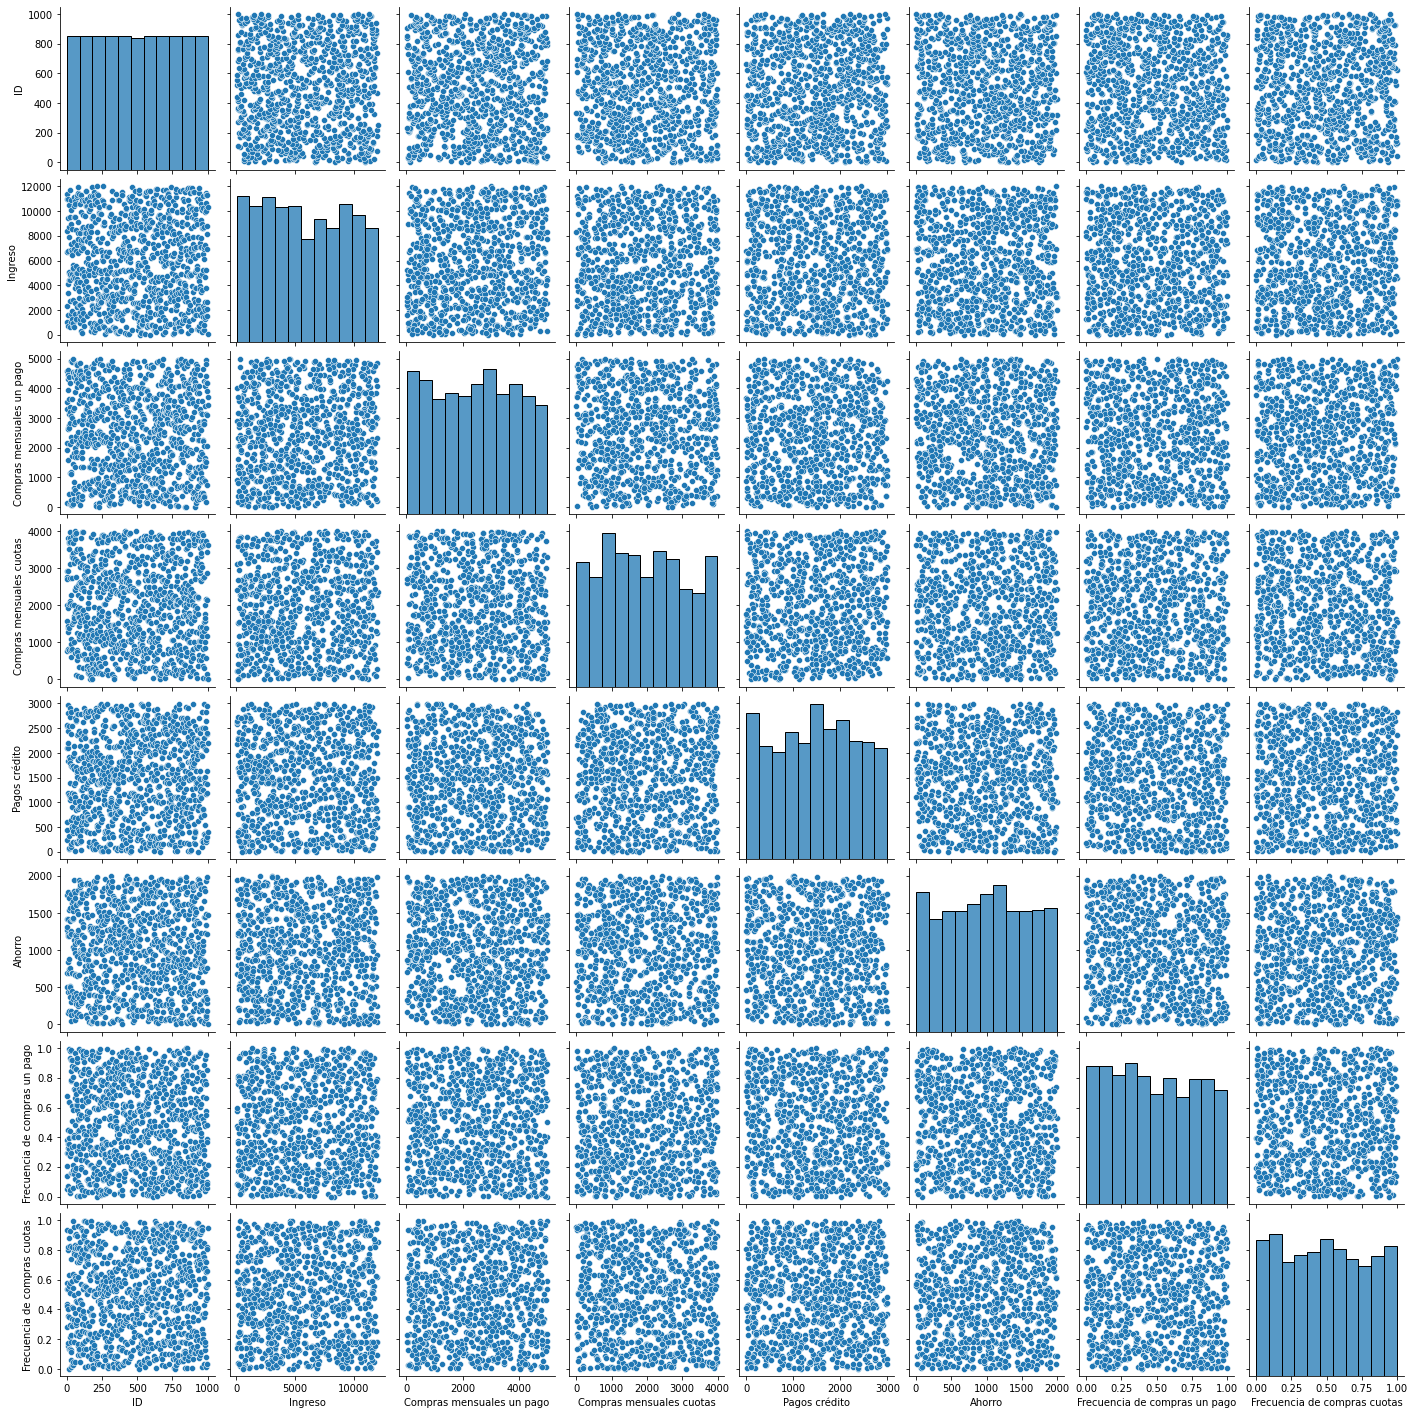

In [ ]:
sns.pairplot(datos)

Agarramos las columnas de ingreso y las compras mensuales en un pago.

                                                                           Sacamos las 3 anomalias

Sacamos outlayers

In [ ]:
Cs1 = datos["Ingreso"].quantile(0.95)
Ci1 = datos["Ingreso"].quantile(0.05)
Cs2 = datos["Compras mensuales un pago"].quantile(0.95)
Ci2 = datos["Compras mensuales un pago"].quantile(0.05)

datos1= datos[(datos['Ingreso'] >= Ci1) & (datos['Ingreso'] <= Cs1) & (datos['Compras mensuales un pago'] >= Ci2) & (datos['Compras mensuales un pago'] <= Cs2)]

In [ ]:
datos1

,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
2,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
3,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
4,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847
6,7,Moyna,Schuchmacher,mschuchmacher6@globo.com,6781.27,4604.24,2923.87,2451.09,1423.19,0.2905,0.1571
...,...,...,...,...,...,...,...,...,...,...,...
993,994,Son,Rabier,srabierrl@imageshack.us,2692.34,4193.03,NaN,2388.39,177.08,0.8565,0.0345
994,995,Bar,Espie,bespierm@blogs.com,1524.82,4175.25,159.15,1185.31,1218.24,0.4804,0.4750
995,996,Adore,Kearle,akearlern@mayoclinic.com,6916.30,739.44,2132.93,2400.08,1990.31,0.3912,0.0311
997,998,Morna,Arrault,marraultrp@netscape.com,2089.96,2059.00,1177.63,1638.11,342.47,0.3671,0.8045


Ahora sacamos los datos duplicados

In [ ]:
datos2 = datos1.drop_duplicates().reset_index(drop = True)

In [ ]:
datos2

,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
1,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
2,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
3,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847
4,7,Moyna,Schuchmacher,mschuchmacher6@globo.com,6781.27,4604.24,2923.87,2451.09,1423.19,0.2905,0.1571
...,...,...,...,...,...,...,...,...,...,...,...
735,994,Son,Rabier,srabierrl@imageshack.us,2692.34,4193.03,NaN,2388.39,177.08,0.8565,0.0345
736,995,Bar,Espie,bespierm@blogs.com,1524.82,4175.25,159.15,1185.31,1218.24,0.4804,0.4750
737,996,Adore,Kearle,akearlern@mayoclinic.com,6916.30,739.44,2132.93,2400.08,1990.31,0.3912,0.0311
738,998,Morna,Arrault,marraultrp@netscape.com,2089.96,2059.00,1177.63,1638.11,342.47,0.3671,0.8045


Observamos que no hubo modificaciones en la cantidad de rows del dataframe,esto indica que no teniamos datos duplicados.

Como hay muchos datos nulos,no lo podemos eliminar( datos2 = datos.dropna() ), y tenemos que reemplazarlo por la media. 

In [ ]:
datos3 = datos2.fillna(datos2["Ingreso"].mean())


In [ ]:
datos4 = datos3.fillna(datos3["Compras mensuales un pago"].mean())

In [ ]:
datos4

,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.020000,2549.02,1738.78,0.1416,0.4345
1,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.300000,2097.06,1272.98,0.2938,0.5352
2,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.440000,434.86,687.89,0.3827,0.5770
3,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.040000,596.96,1306.75,0.0512,0.2847
4,7,Moyna,Schuchmacher,mschuchmacher6@globo.com,6781.27,4604.24,2923.870000,2451.09,1423.19,0.2905,0.1571
...,...,...,...,...,...,...,...,...,...,...,...
735,994,Son,Rabier,srabierrl@imageshack.us,2692.34,4193.03,5775.672622,2388.39,177.08,0.8565,0.0345
736,995,Bar,Espie,bespierm@blogs.com,1524.82,4175.25,159.150000,1185.31,1218.24,0.4804,0.4750
737,996,Adore,Kearle,akearlern@mayoclinic.com,6916.30,739.44,2132.930000,2400.08,1990.31,0.3912,0.0311
738,998,Morna,Arrault,marraultrp@netscape.com,2089.96,2059.00,1177.630000,1638.11,342.47,0.3671,0.8045


Ya no tenemos datos nulos

<AxesSubplot:>

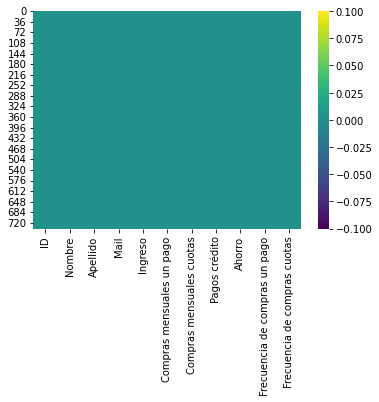

In [ ]:
sns.heatmap(datos4.isnull(),cmap="viridis")

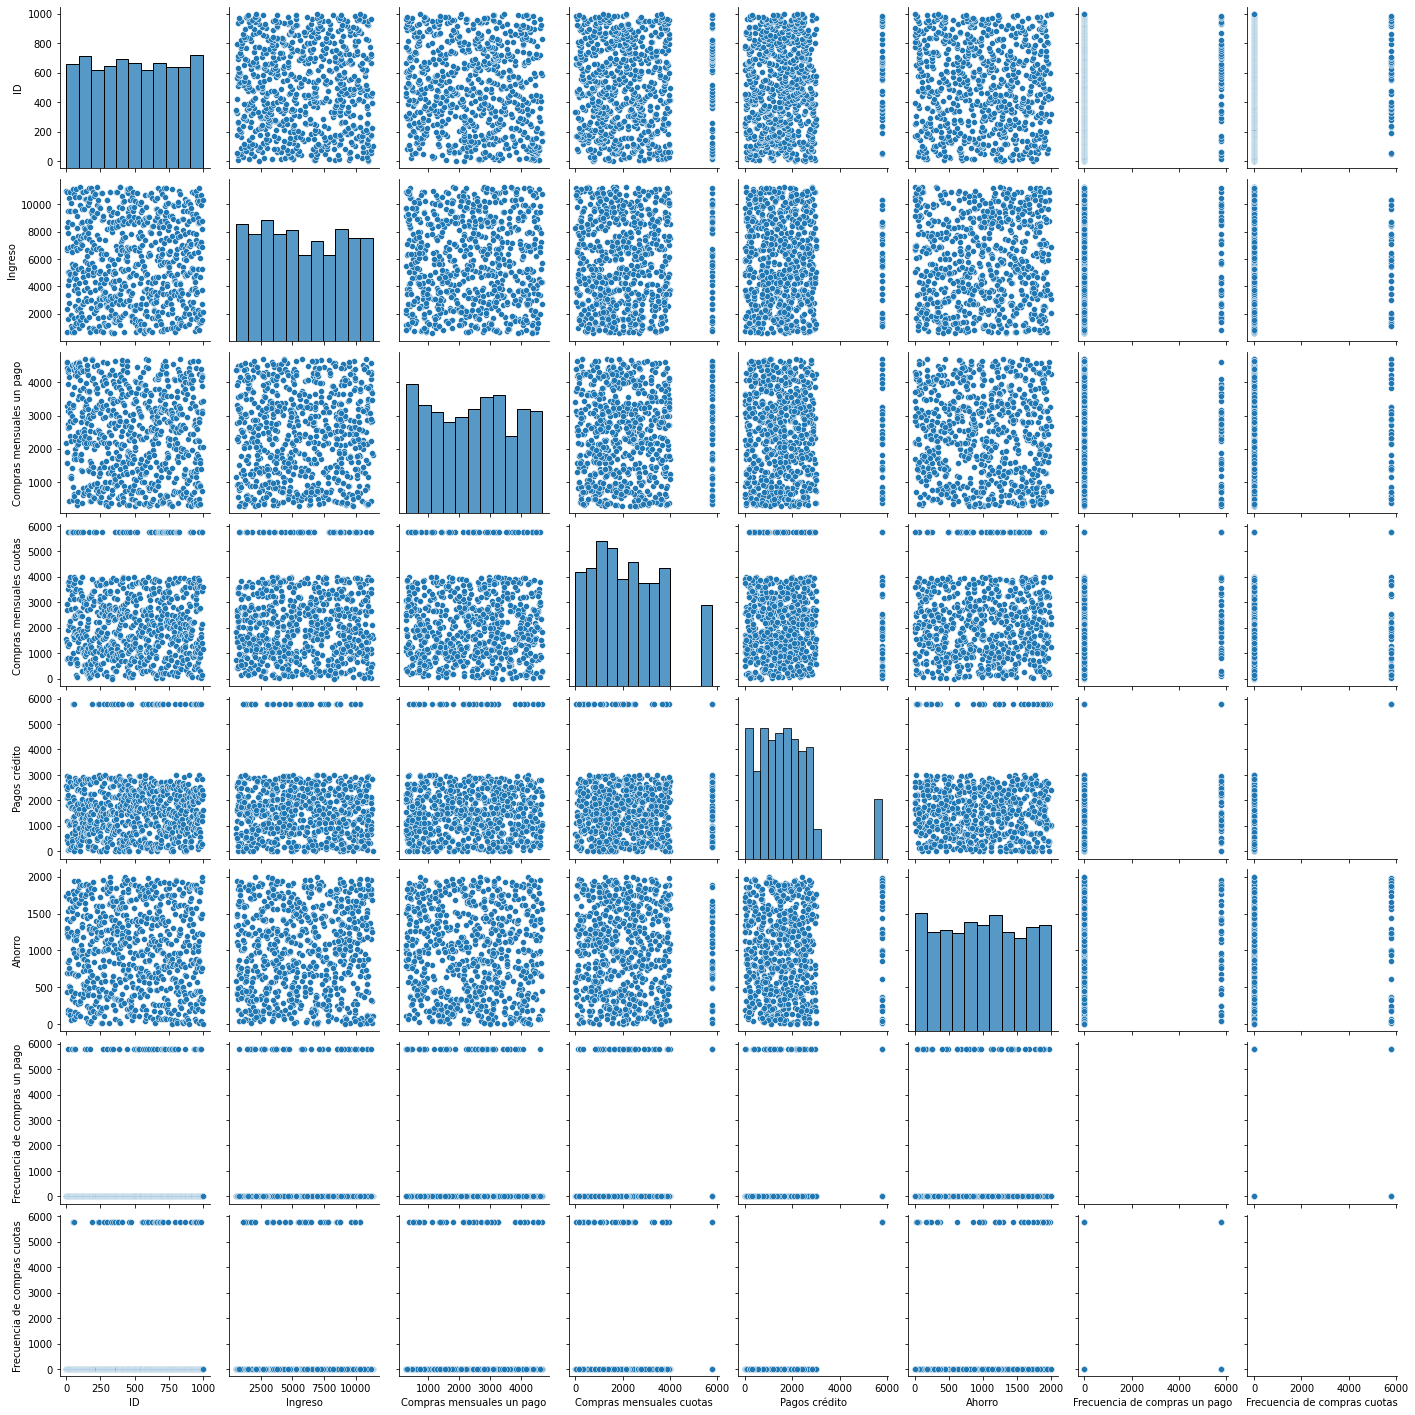

In [238]:
sns.pairplot(datos4)

Luego de limpiar y filtrar los datos, ahora normalizamos.

In [239]:
scaler = StandardScaler()
datos_escalado = scaler.fit_transform(datos4[columnas])

Una vez que normalizamos, observamos las inercias y hacemos el kmeans.

In [240]:
def inercias_por_k(datos_escalado):
  inercias = {}
  for i in range(1,11):
      kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
      kmeans.fit(datos_escalado)
      inercias[i] = kmeans.inertia_
  return inercias

In [241]:
inercias = inercias_por_k(datos_escalado)

In [242]:
inercias

{1: 5180.0,
 2: 4017.864078391988,
 3: 3469.0453072401315,
 4: 2810.2395878415828,
 5: 2488.6723261961847,
 6: 2234.189241753561,
 7: 2023.972168621574,
 8: 1866.8021341306255,
 9: 1767.1112690405503,
 10: 1684.0889889574928}

In [243]:
datos_inercias = pd.DataFrame(inercias.items(),columns=["k","inercia"] )

<AxesSubplot:xlabel='k', ylabel='inercia'>

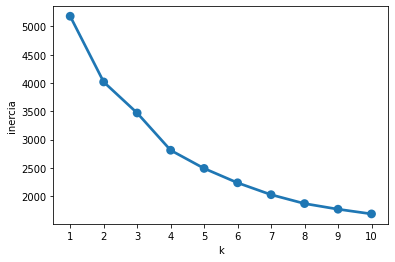

In [244]:
sns.pointplot(data =datos_inercias, x = "k", y ="inercia")

Observamos que no se marca bien el quiebre de la pendiente, por ende no hay un k claro y especifico. Y no observamos el quiebre en el grafico del codo.

En el hipotetico caso que se notara clara el quiebre podemos ver que el mejor k seria 4.

In [245]:
k = 4
#agrupar
KMeans = KMeans(n_clusters=k, init = "random",n_init=10,max_iter=500,random_state=123457)
KMeans.fit(datos_escalado)

KMeans(init='random', max_iter=500, n_clusters=4, random_state=123457)

<AxesSubplot:>

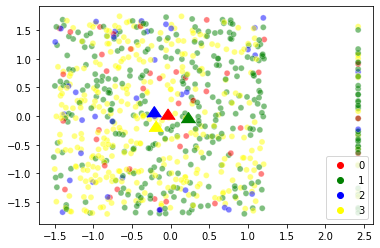

In [262]:
colores = ["red", "green", "blue","yellow"]
sns.scatterplot(x = datos_escalado[:,2], y= datos_escalado[:,4], hue = KMeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x = KMeans.cluster_centers_[:,2], y = KMeans.cluster_centers_[:, 4], zorder = 10, palette = colores, hue= [0,1,2,3], legend = False, marker = 6, s = 200)

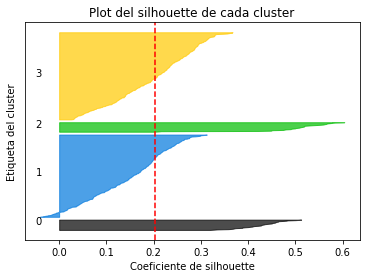

In [254]:
silhouette_avg = silhouette_score(datos_escalado, KMeans.labels_)
sample_silhouette_values = silhouette_samples(datos_escalado, KMeans.labels_)

def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, KMeans.labels_, sample_silhouette_values, silhouette_avg)